loveencompassesarangeofstrongandpositiveemotionalandmentalstatesfromthemostsublimevirtueorgoodhabitthedeepestinterpersonalaffectiontothesimplestpleasureanexampleofthisrangeofmeaningsisthattheloveofamotherdiffersfromtheloveofaspousewhichdiffersfromtheloveforfoodmostcommonlylovereferstoafeelingofstrongattractionandemotionalattachmentloveisconsideredtobebothpositiveandnegativewithitsvirtuerepresentinghumankindnesscompassionandaffectiontheunselfishloyalandbenevolentconcernforthegoodofanotheranditsvicerepresentingahumanmoralflawakintovanityselfishnessamourpropreandegotismpotentiallyleadingpeopleintoatypeofmaniaobsessivenessorcodependencyitmayalsodescribecompassionateandaffectionateactionstowardsotherhumansoneselforanimalsinitsvariousformsloveactsasamajorfacilitatorofinterpersonalrelationshipsandowingtoitscentralpsychologicalimportanceisoneofthemostcommonthemesinthecreativeartslovehasbeenpostulatedtobeafunctionthatkeepshumanbeingstogetheragainstmenacesandtofacilitatethecontinuationofthespeci

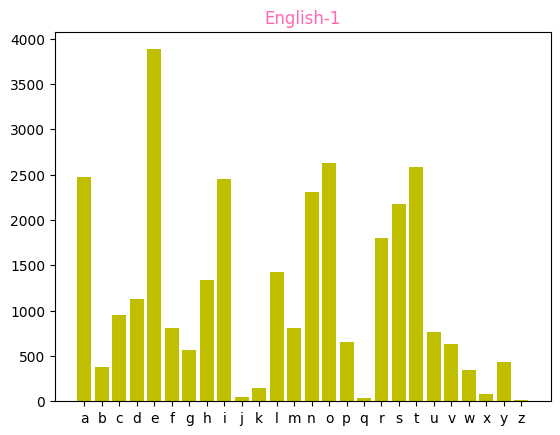

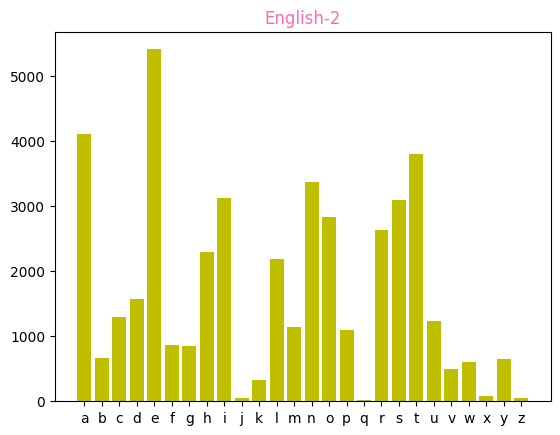

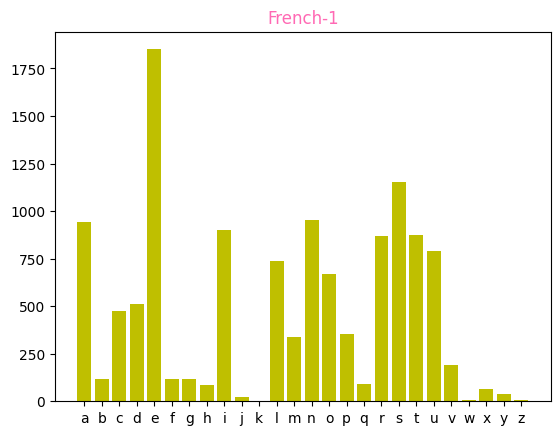

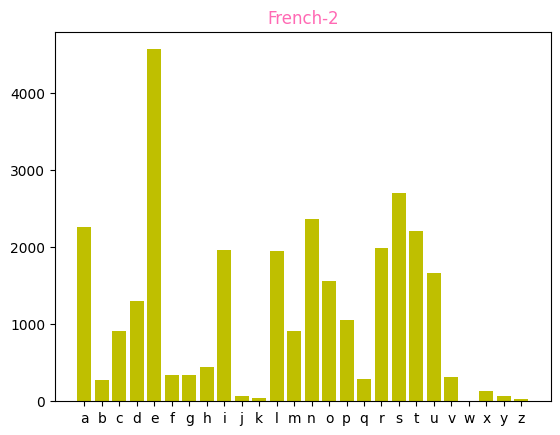

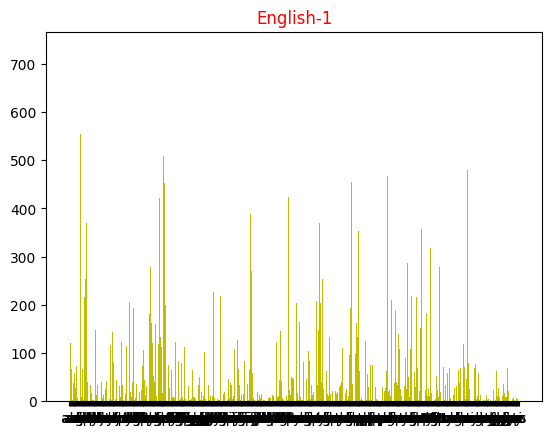

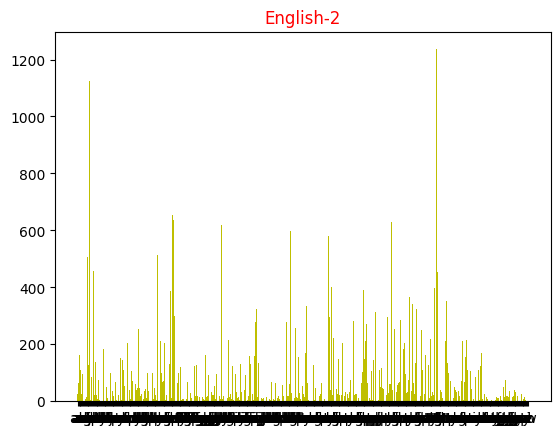

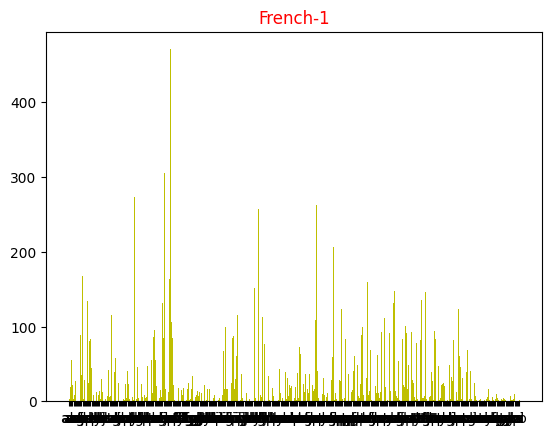

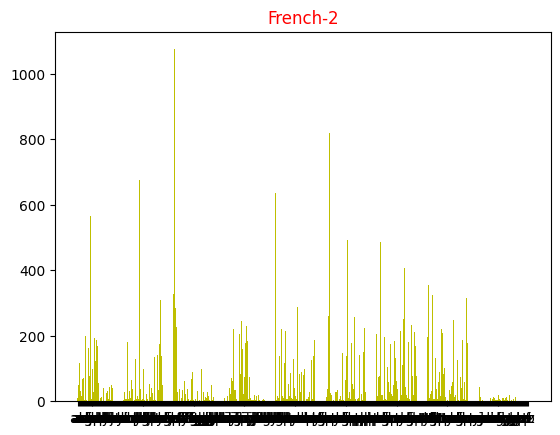

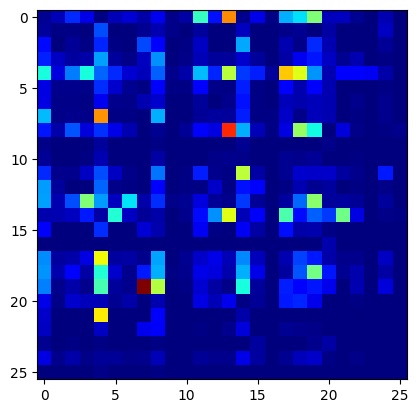

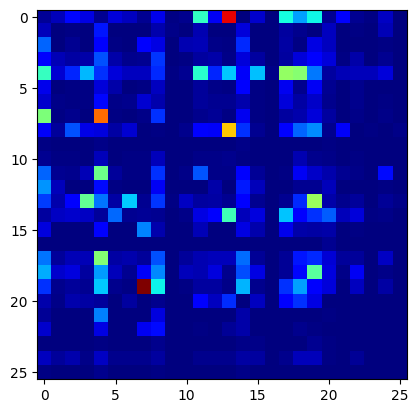

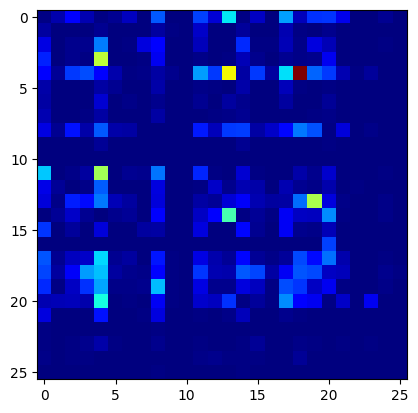

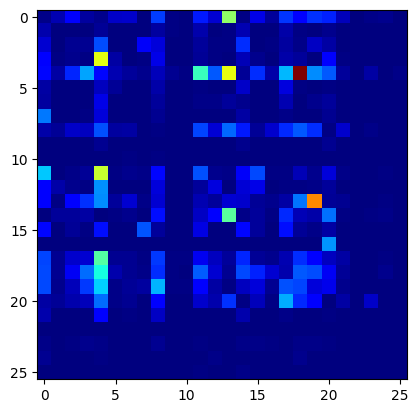


English-1:
('t', 'h') : 730.0
('i', 'n') : 633.0
('a', 'n') : 555.0
('h', 'e') : 548.0
('e', 'r') : 509.0
('v', 'e') : 480.0
('r', 'e') : 468.0
('o', 'n') : 454.0
('e', 's') : 453.0
('l', 'o') : 423.0

English-2:
('t', 'h') : 1236.0
('a', 'n') : 1123.0
('h', 'e') : 981.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 653.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French-1:
('e', 's') : 471.0
('e', 'n') : 305.0
('d', 'e') : 274.0
('n', 't') : 262.0
('l', 'e') : 257.0
('o', 'n') : 206.0
('u', 'e') : 178.0
('a', 'n') : 167.0
('e', 'r') : 163.0
('r', 'e') : 159.0

French-2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


In [24]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


topic1 = 'Rose'
topic2= 'Elephant'

wikipedia.set_lang('en')

en1 = wikipedia.page(topic1).content
en2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

en1 = cleanup(en1)
en2 = cleanup(en2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

print(en1)
print(en2)
print(fr1)
print(fr2)

def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values,color='y')

unigram_en1 = Counter(ngrams(en1,1))
plothistogram(unigram_en1)
plt.title('English-1',color='hotpink')
plt.show()
unigram_en2 = Counter(ngrams(en2,1))
plothistogram(unigram_en2)
plt.title('English-2',color='hotpink')
plt.show()

unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French-1',color='hotpink')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French-2',color='hotpink')
plt.show()


bigram_en1 = Counter(ngrams(en1,2))
plothistogram(bigram_en1)
plt.title('English-1',color='r')
plt.show()

bigram_en2 = Counter(ngrams(en2,2))
plothistogram(bigram_en2)
plt.title('English-2',color='r')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_fr1)
plt.title('French-1',color='r')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French-2',color='r')
plt.show()

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

bien1 = plotbihistogram(bigram_en1)
plt.show()
bien2 = plotbihistogram(bigram_en2)
plt.show()

bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)
plt.show()



from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

print('\nEnglish-1:')
ShowTopN(bien1)
print('\nEnglish-2:')
ShowTopN(bien2)
print('\nFrench-1:')
ShowTopN(bifr1)
print('\nFrench-2:')
ShowTopN(bifr2)

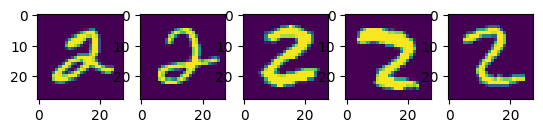

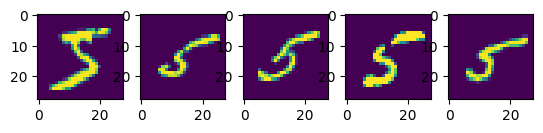

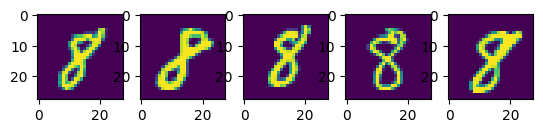

<ipython-input-34-a7360436c014>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


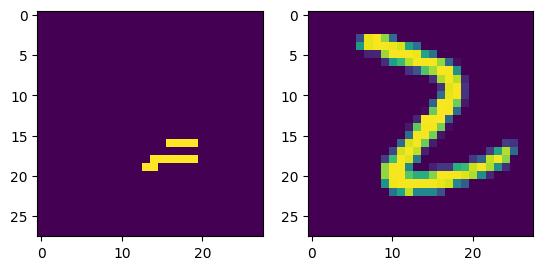

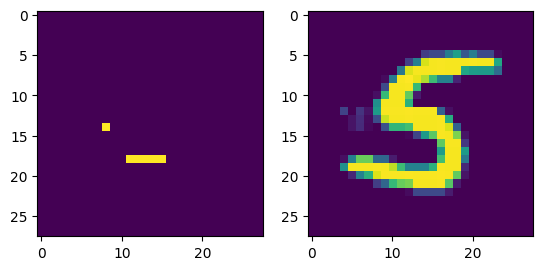

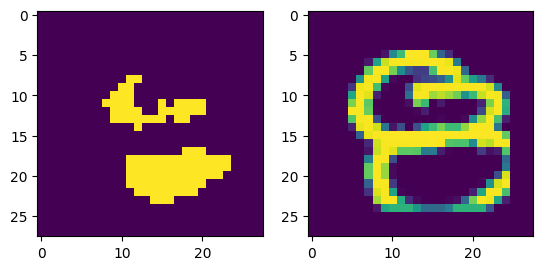

<ipython-input-34-a7360436c014>:72: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


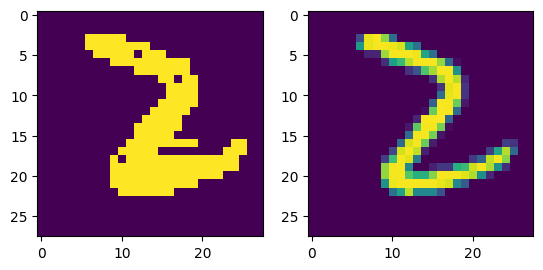

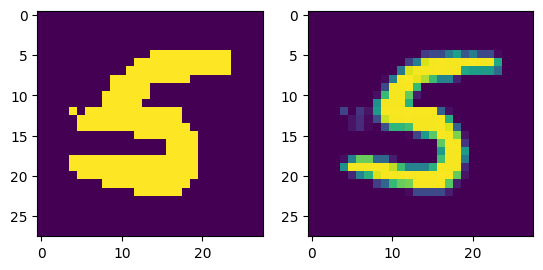

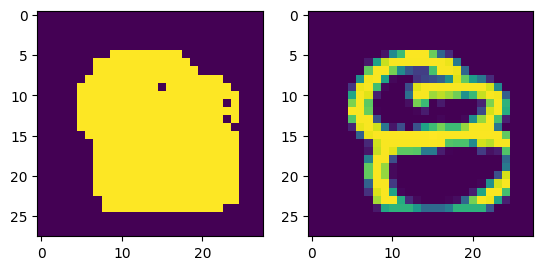

<ipython-input-34-a7360436c014>:100: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


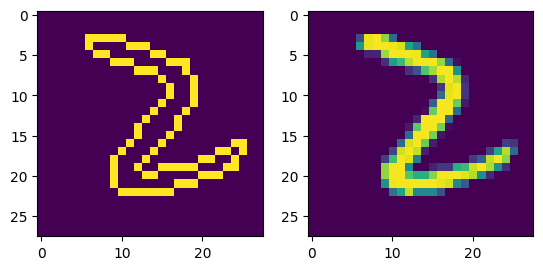

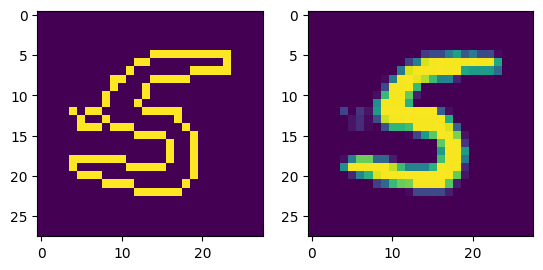

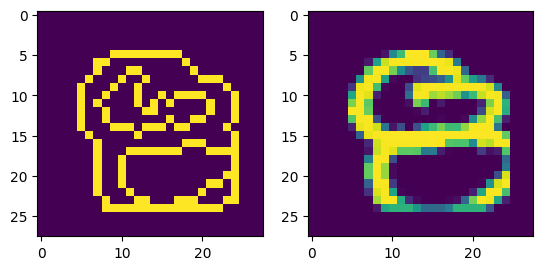

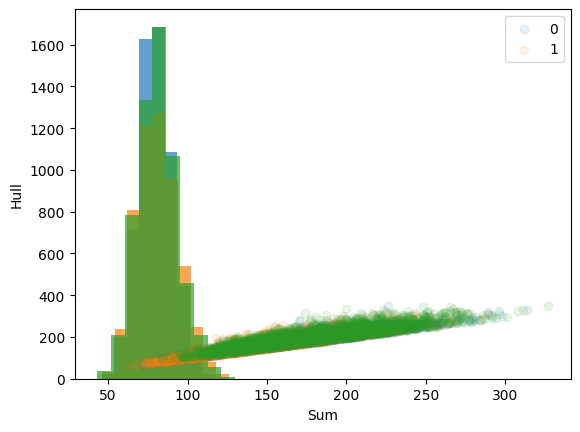

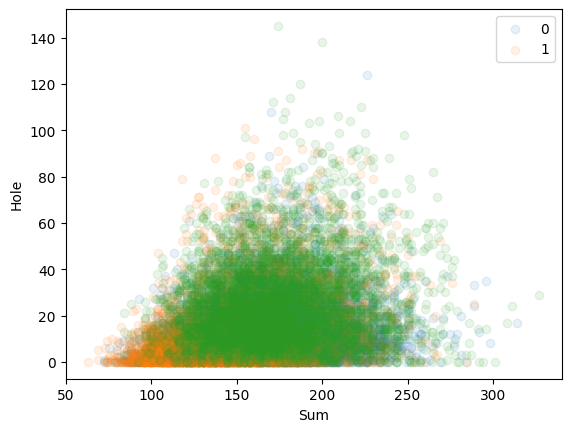

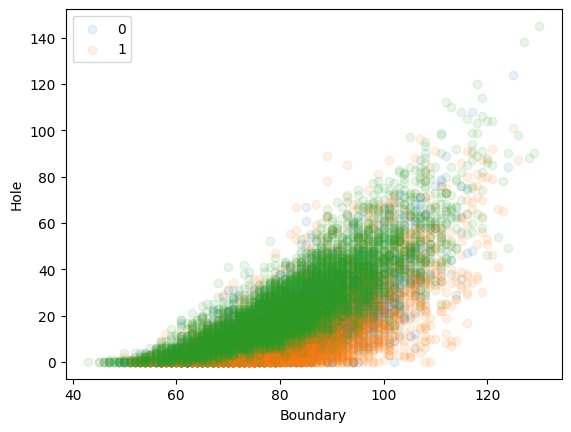

In [34]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

no2 = train_X[train_y==2,:,:]
no5 = train_X[train_y==5,:,:]
no8 = train_X[train_y==8,:,:]

for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no5[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no8[ii,:,:])
plt.show()

sum2 = np.sum(no2>0, (1,2))
sum5 = np.sum(no5>0, (1,2))
sum8 = np.sum(no8>0, (1,2))

plt.hist(sum2, alpha=0.8);
plt.hist(sum5, alpha=0.8);
plt.hist(sum8, alpha=0.8);

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole

imgs = [no2[456,:,:],  no5[456,:,:],  no8[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole5 = np.array([getHolePixels(i).sum() for i in no5])
hole8 = np.array([getHolePixels(i).sum() for i in no8])

plt.hist(hole2, alpha=0.7);
plt.hist(hole5, alpha=0.7);
plt.hist(hole8, alpha=0.7);

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  return hull

imgs = [no2[456,:,:],  no5[456,:,:],  no8[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull5 = np.array([getHullPixels(i).sum() for i in no5])
hull8 = np.array([getHullPixels(i).sum() for i in no8])

plt.hist(hull2, alpha=0.7);
plt.hist(hull5, alpha=0.7);
plt.hist(hull8, alpha=0.7);

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

imgs = [no2[456,:,:],  no5[456,:,:],  no8[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

bound2= np.array([getBoundaryPixels(i).sum() for i in no2])
bound5= np.array([getBoundaryPixels(i).sum() for i in no5])
bound8= np.array([getBoundaryPixels(i).sum() for i in no8])

plt.hist(bound2, alpha=0.7);
plt.hist(bound5, alpha=0.7);
plt.hist(bound8, alpha=0.7);

plt.scatter(sum2, hull2, alpha=0.1)
plt.scatter(sum5, hull5, alpha=0.1)
plt.scatter(sum8, hull8, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

plt.scatter(sum2, hole2, alpha=0.1)
plt.scatter(sum5, hole5, alpha=0.1)
plt.scatter(sum8, hole8, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

plt.scatter(bound2, hole2, alpha=0.1)
plt.scatter(bound5, hole5, alpha=0.1)
plt.scatter(bound8, hole8, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

cl2 = ['class 2']*len(sum2)
cl5 = ['class 5']*len(sum5)
cl8 = ['class 8']*len(sum8)
df = pd.DataFrame(list(zip(np.concatenate((hole2, hole5, hole8)), np.concatenate((sum2,sum5,sum8)),
                           np.concatenate((bound2,bound5,bound8)), np.concatenate((cl2, cl5,cl8)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()